# A bit of motivation (Sound processing)

At the start of a programming class, students don't know how to express their thoughts to the computer using code. Unfortunately, that means that instructors tend to start with trivial code examples, which aren't very interesting.  I would like to start this course with an interesting application of computing as a way of motivating you to learn how to write code. The payoff, for even a little bit of code, can be huge. I don't expect you to understand all the details initially, just the broad strokes.  In this first lecture/lab, we're going to leverage existing libraries of code to learn how computers represent music and other sound files.

As we go along, you'll encounter a number of completely new tasks, such as installing new software on your computer from the command line.  Rather than provide bite-size lectures on specific topics, we'll examine some real applications that require skills and knowledge across topics. It's better to see how all of the pieces fit together, rather than looking at topics in isolation. As you gain more experience, you will look back to these early examples and have an "ah ha!" moment when everything clicks into place for you.

## Playing sound files

We all play music files on our computers. For example, here are two interesting ones: [initial sequence from Kiss by Prince](../data/sound/Kiss.aiff) and [ahhhh mp3](../data/sound/ahhh.mp3).  You can download those and play them using your music player. But, what if we're building a game or doing speech recognition and we need Python to load sound files and play them?

By leveraging libraries of code, which are like cookbooks, we can play audio files with just a few lines of Python code.

In [2]:
import soundfile as sf
from IPython.display import Audio

kiss, samplerate = sf.read('../data/sound/Kiss.aiff')
Audio(kiss, rate=samplerate)

In [3]:
print kiss[5000:5100]  # kiss is a numpy ndarray that you will become intimately familiar with
print "n =",len(kiss),", rate =",samplerate,"hz"

[  3.05175781e-05   0.00000000e+00  -9.15527344e-05   1.83105469e-04
  -2.44140625e-04   3.05175781e-04  -3.35693359e-04   3.05175781e-04
  -2.74658203e-04   2.74658203e-04  -2.13623047e-04   6.10351562e-05
   3.05175781e-05  -3.05175781e-05   6.10351562e-05  -3.05175781e-05
  -9.15527344e-05   1.52587891e-04  -1.52587891e-04   1.52587891e-04
  -9.15527344e-05   3.05175781e-05  -3.05175781e-05   0.00000000e+00
   3.05175781e-05  -6.10351562e-05   9.15527344e-05  -3.05175781e-05
  -6.10351562e-05   9.15527344e-05  -1.22070312e-04   1.83105469e-04
  -1.52587891e-04   9.15527344e-05  -6.10351562e-05   6.10351562e-05
  -6.10351562e-05   1.22070312e-04  -2.13623047e-04   2.44140625e-04
  -2.13623047e-04   1.52587891e-04  -9.15527344e-05   3.05175781e-05
   3.05175781e-05  -6.10351562e-05   3.05175781e-05   0.00000000e+00
  -3.05175781e-05   9.15527344e-05  -1.22070312e-04   6.10351562e-05
   0.00000000e+00  -6.10351562e-05   6.10351562e-05   0.00000000e+00
  -6.10351562e-05   6.10351562e-05

In [4]:
from IPython.display import Audio
Audio('../data/sound/ahhh.wav')

In [5]:
import numpy
fs = 44100 # sampling frequency
T = 1.5    # seconds
t = numpy.linspace(0, T, int(T*fs), endpoint=False) # time variable
y = numpy.sin(2*numpy.pi*440*t)                     # pure sine wave at 440 Hz
Audio(y, rate=fs)

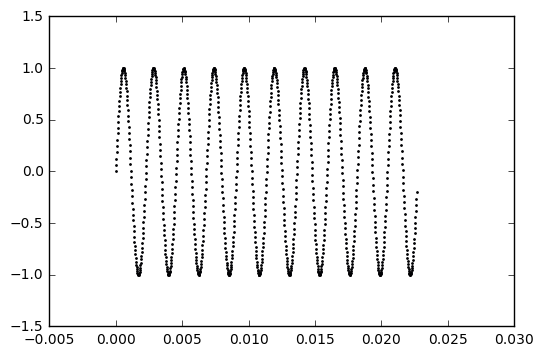

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(t[0:1000],y[0:1000],s=1)

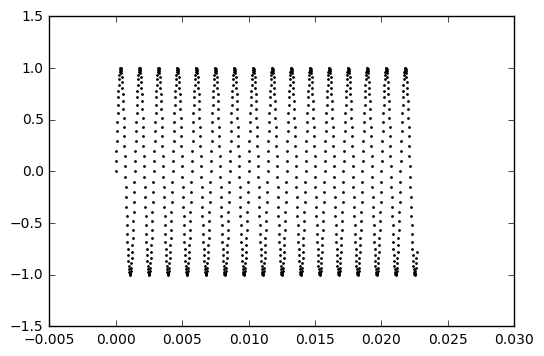

In [7]:
y2 = numpy.sin(2*numpy.pi*700*t)                     # pure sine wave at 700 Hz
plt.scatter(t[0:1000],y2[0:1000],s=1)
Audio(y2, rate=fs)

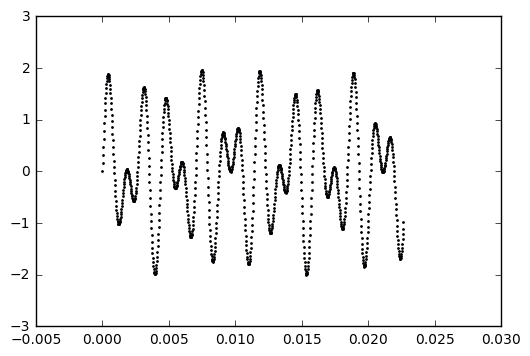

In [8]:
plt.scatter(t[0:1000],y[0:1000]+y2[0:1000],s=1)
Audio(y+y2, rate=fs)

In [9]:
import soundfile as sf

ahhh, samplerate = sf.read('../data/sound/ahhh.wav')
print ahhh[:,0] # left channel
print ahhh[:,0] # right channel (stereo)

print "n =",len(ahhh),", rate =",samplerate,"hz"

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
n = 330624 , rate = 44100 hz


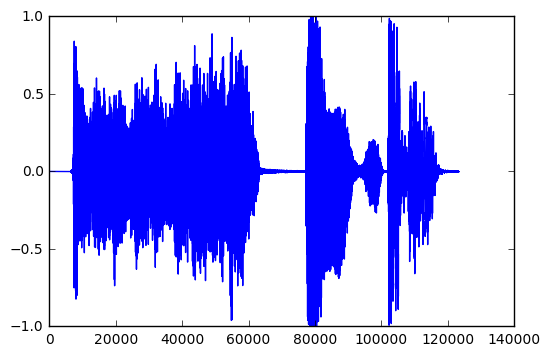

In [10]:
plt.plot(kiss);

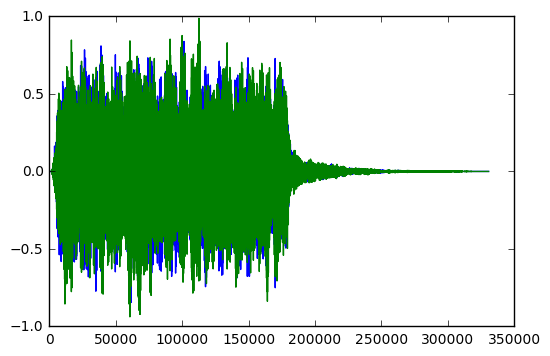

In [11]:
plt.plot(ahhh);

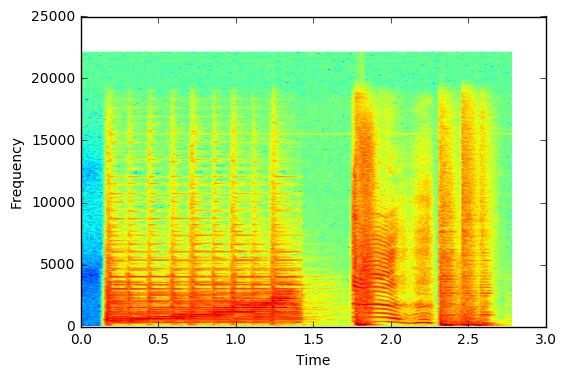

In [15]:
S, freqs, bins, im = plt.specgram(kiss, NFFT=1024, Fs=fs, noverlap=512)

# Plot a spectrogram
plt.xlabel('Time')
plt.ylabel('Frequency')

In [13]:
sf.write('test.wav', ahhh, samplerate)

## Exercises

[A first taste of Python tools](labs/hello.md)

[Playing sounds](labs/sound.md)